# Load Libraries

In [1]:
# Base Class
import tensorflow as tf
import os

# Layers
from keras import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Utilities
from keras.utils import to_categorical

# Dataset
from keras.datasets import mnist
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# Allocate memory so it doesn't end up with `Out of Memory`

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Load Data

In [3]:
# Load datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Looking shapes of train and test datasets
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)

print()

print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)

X_test shape : (10000, 28, 28)
y_test shape : (10000,)


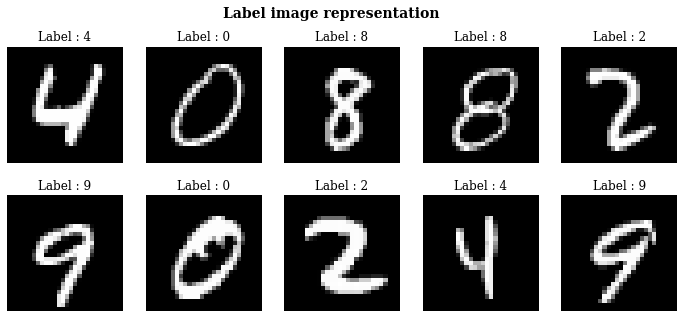

In [5]:
# Showing some images in matplotlib

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))

fig.suptitle('Label image representation', fontsize=14, fontweight='bold', fontfamily='serif')

for ax in axs.flatten():
    rnd_number = np.random.randint(low=0, high=len(X_train))

    ax.imshow(X_train[rnd_number], cmap='gray')
    ax.set_title(f'Label : {y_train[rnd_number]}', fontfamily='serif')

    ax.set_axis_off()

# Preprocess data

In [6]:
# Add padding and after reshape, so It can hold the requirement the LeNet-5 model desires which input example shape is (32, 32, 1)
X_train_mod = np.pad(X_train, ((0, 0), (2, 2), (2, 2)))
X_test_mod = np.pad(X_test, ((0, 0), (2, 2), (2, 2)))

In [7]:
# Reshape data
X_train_mod = X_train_mod.reshape(-1, 32, 32, 1)
X_test_mod = X_test_mod.reshape(-1, 32, 32, 1)

In [8]:
# Normalize data
X_train_mod = X_train_mod / 255.0
X_test_mod = X_test_mod / 255.0

In [9]:
# One - Hot Encoding
y_train_mod = to_categorical(y_train)
y_test_mod = to_categorical(y_test)

# Create Model and Train

In [10]:
# LeNet-5 Structure

model = Sequential()

# Convolutional Layer as C1
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 1)))

# Pooling Layer as P2
model.add(AveragePooling2D(pool_size=(2, 2)))

# Convolutional Layer as C3
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

# Pooling Layer as P4
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten Layer as F5
model.add(Flatten())

# Dense Layer as D6
model.add(Dense(120, activation='relu'))

# Dense Layer as D7
model.add(Dense(84, activation='relu'))

# Dense Layer as D8
model.add(Dense(10, activation='softmax'))

In [11]:
# Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [32]:
# Compile and fit model

callback = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('best.h5', monitor='val_loss', save_best_only=True)
]

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train_mod, y_train_mod, epochs=15, validation_data=(X_test_mod, y_test_mod), callbacks=callback)

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0390 - val_accuracy: 0.9886
Epoch 2/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0424 - val_accuracy: 0.9884
Epoch 3/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0389 - val_accuracy: 0.9890
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0544 - val_accuracy: 0.9872
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0394 - val_accuracy: 0.9897
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0488 - val_accuracy: 0.9866
Epoch 6: early stopping


# Evaluate Model

In [33]:
model.evaluate(X_test_mod, y_test_mod)

313/313 [==============================] - 2s 5ms/step - loss: 0.0389 - accuracy: 0.9890


[0.0388878658413887, 0.9890000224113464]

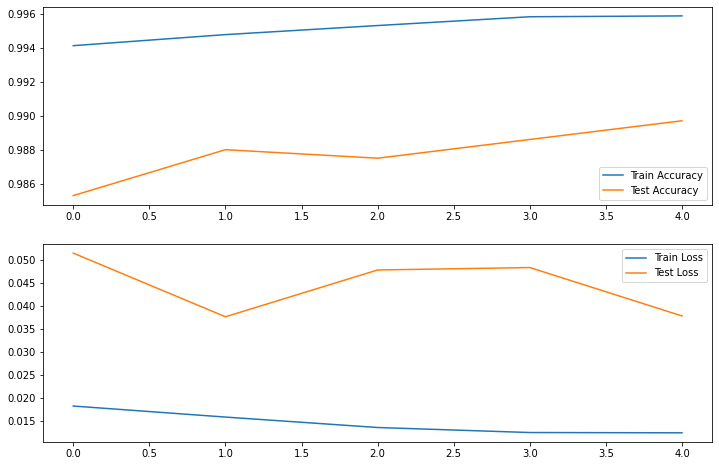

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Test Accuracy')

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Test Loss')

ax[0].legend()
ax[1].legend()

plt.show()

* From here, We can see It is enough if we use 10 epoch, after epoch > 10, that leads to overfitting !

# Predict Cases

1/1 [==============================] - 0s 24ms/step


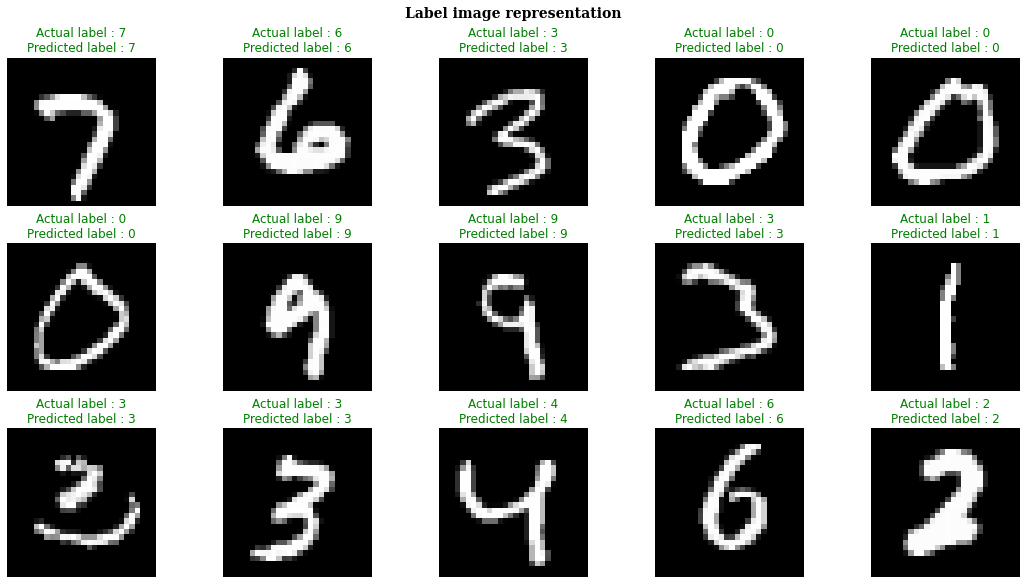

In [16]:
# Predict a bunch of examples in this model

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 8), constrained_layout=True)

fig.suptitle('Label image representation', fontsize=14, fontweight='bold', fontfamily='serif')

for ax in axs.flatten():
    rnd_number = np.random.randint(low=0, high=len(X_test))
    _trained_sample = X_test_mod[rnd_number].reshape(-1, 32, 32, 1)

    prediction_vect = model.predict(_trained_sample)
    prediction_label = tf.argmax(prediction_vect, axis=1).numpy()[0]

    ax.imshow(X_test[rnd_number], cmap='gray')

    actual_label = y_test[rnd_number]

    if actual_label == prediction_label:
        ax.set_title(f'Actual label : {y_test[rnd_number]}\n' + 
                    f'Predicted label : {prediction_label}', color='green')
    
    else:
        ax.set_title(f'Actual label : {y_test[rnd_number]}\n' + 
                     f'Predicted label : {prediction_label}', color='red')
    
    ax.set_axis_off()

# Predict cases that We created (Paint, Photo)

In [21]:
def get_ImageLabel(dir_name : str, paint : bool):
    collections = {}
    abs_dir_name = os.path.abspath(dir_name)

    for _label in os.listdir(dir_name):
        collections[int(_label)] = []
        
        dir_full = os.path.join(abs_dir_name, _label)

        for img_path in os.listdir(dir_full):
            img = cv2.imread(os.path.join(dir_full, img_path), 1)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            if paint:
                collections[int(_label)].append(img_rgb)
            else:

                collections[int(_label)].append(cv2.bitwise_not(img_rgb))
            
        
    return collections

def get_count(collections : dict):
    _cnt = 0
    
    for key, value in collections.items():
       _cnt+= len(value)
    
    return _cnt

In [23]:
collections = get_ImageLabel('test_paint', True)

1/1 [==============================] - 0s 30ms/step


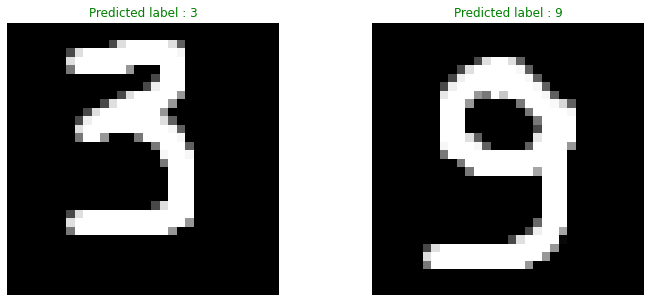

In [25]:
_cnt_of_img = get_count(collections)

fig, axs = plt.subplots(nrows=1, ncols=_cnt_of_img, figsize=(12, 5))

_ax_flatten = axs.flatten()
_ax_index = 0

for _label in collections.keys():
    for img in collections[_label]:
        # Normalizing and reshaping
        img_prep = img.reshape(1, 32, 32, 1) / 255

        predicted_vect = model.predict(img_prep)
        predicted_label = tf.argmax(predicted_vect, axis=1).numpy()[0]

        ax = _ax_flatten[_ax_index]
        ax.imshow(img, cmap='gray')

        if _label == predicted_label:
            ax.set_title('Predicted label : {}'.format(predicted_label), color='green')
        else:
            ax.set_title('Predicted label : {}\nActual label : {}'.format(predicted_label, _label), color='red')

        ax.set_axis_off()

        _ax_index+= 1

In [28]:
collections = get_ImageLabel('test_photo', False)

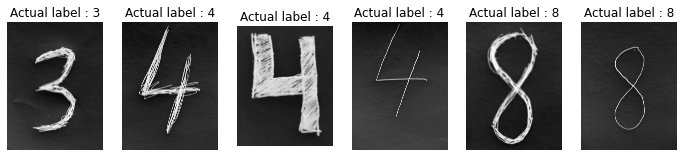

In [29]:
_cnt_of_img = get_count(collections)

fig, axs = plt.subplots(nrows=1, ncols=_cnt_of_img, figsize=(12, 5))

_ax_flatten = axs.flatten()
_ax_index = 0

for _label in collections.keys():
    for img in collections[_label]:
        ax = _ax_flatten[_ax_index]
        ax.imshow(img, cmap='gray')

        ax.set_title('Actual label : {}'.format(_label))
        ax.set_axis_off()

        _ax_index+= 1

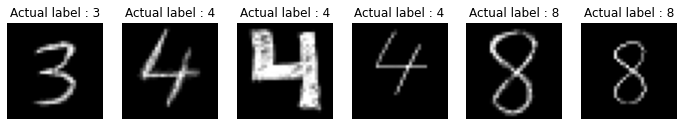

In [30]:
_cnt_of_img = get_count(collections)

fig, axs = plt.subplots(nrows=1, ncols=_cnt_of_img, figsize=(12, 5))

_ax_flatten = axs.flatten()
_ax_index = 0

for _label in collections.keys():
    for img in collections[_label]:
        ax = _ax_flatten[_ax_index]

        img_sharpen1 = cv2.threshold(img, thresh=165, maxval=255, type=cv2.THRESH_BINARY)[1]
        img_reshape = cv2.resize(img_sharpen1, (32, 32), interpolation=cv2.INTER_AREA)

        # img_sharpen2 = cv2.threshold(img_reshape, thresh=150, maxval=255, type=cv2.THRESH_BINARY)[1]

        ax.imshow(img_reshape, cmap='gray')

        ax.set_title('Actual label : {}'.format(_label))
        ax.set_axis_off()

        _ax_index+= 1

1/1 [==============================] - 0s 22ms/step


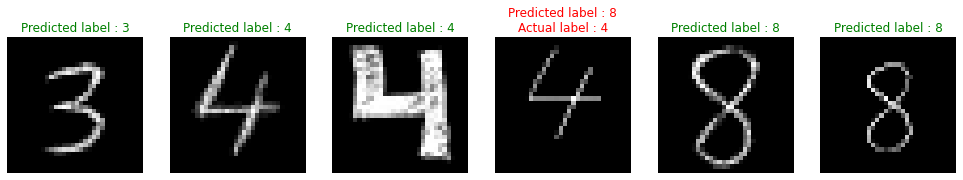

In [31]:
_cnt_of_img = get_count(collections)

fig, axs = plt.subplots(nrows=1, ncols=_cnt_of_img, figsize=(17, 8))

_ax_flatten = axs.flatten()
_ax_index = 0

for _label in collections.keys():
    for img in collections[_label]:
        ax = _ax_flatten[_ax_index]

        img_sharpen1 = cv2.threshold(img, thresh=165, maxval=255, type=cv2.THRESH_BINARY)[1]
        img_resize = cv2.resize(img_sharpen1, (32, 32), interpolation=cv2.INTER_AREA)

        # img_sharpen2 = cv2.threshold(img_resize, thresh=240, maxval=255, type=cv2.THRESH_BINARY)[1]
        ax.imshow(img_resize, cmap='gray')

        # Normalize and reshape
        img_reshape = img_resize.reshape(1, 32, 32, 1) / 255

        predicted_vect = model.predict(img_reshape)
        predicted_label = tf.argmax(predicted_vect, axis=1).numpy()[0]
    

        if _label == predicted_label:
            ax.set_title('Predicted label : {}'.format(_label), color='green')
        else:
            ax.set_title('Predicted label : {}\n'.format(predicted_label) + 
                         'Actual label : {}'.format(_label), color='red')

        ax.set_axis_off()

        _ax_index+= 1